In [2]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import cartopy.crs as ccrs
import os
import datetime
from datetime import timedelta
from datetime import datetime
from matplotlib import ticker
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature
import geopandas as gp
import regionmask
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D
from scipy import stats

In [ ]:
def remove_time_mean(x):
    return x - x.mean(dim='time')

def standardize(x):
    return x/x.std(dim = 'time')

## Data prep

In [18]:
# ERA5
#precip_datadir = '/dx01/data/ERA5/precip_dailytotal/*.nc'

# IMD
#precip_datadir = '/dx02/data/IMD/*.nc'
#precip_data = xr.open_mfdataset(precip_datadir, parallel = True, combine = 'by_coords')

# CPC
#precip_datadir = '/dx01/data/CPC/precip_daily_total/*.nc'
#precip_data = xr.open_mfdataset(precip_datadir, parallel = True, combine = 'by_coords')

# APHRODITE
#precip_datadir = '/dx02/data/APHRODITE/025deg/*.nc'
#precip_data = xr.open_mfdataset(precip_datadir, parallel = True, combine = 'by_coords')

In [5]:
shp_datadir = '/home/ivanov/jupyternb/Monsoon_TW/shape_files/'

CNE = gp.read_file(shp_datadir + 'Central_Northeast.shp')
HR = gp.read_file(shp_datadir + 'Hilly_Regions.shp')
NW = gp.read_file(shp_datadir + 'Northwest.shp')
SP = gp.read_file(shp_datadir + 'South_Peninsular.shp')
WC = gp.read_file(shp_datadir + 'West_Central.shp')
NE = gp.read_file(shp_datadir + 'Northeast.shp')
bgd = gp.read_file(shp_datadir + 'bangladesh.shp')
pak = gp.read_file(shp_datadir + 'pakistan.shp')

In [6]:
# For CHIRPS
#lat_name = 'latitude'
#lon_name = 'longitude'
#var_name = 'precip'
#time_name = 'time'

# For ERA5
#lat_name = 'latitude'
#lon_name = 'longitude'
#var_name = 'tp'
#time_name = 'time'
#enddir = "/dx01/ivanov/data/ERA5/monsoon_humidheat_timing/"

# For IMD
#lat_name = 'LATITUDE'
#lon_name = 'LONGITUDE'
#var_name = 'RAINFALL'
#time_name = 'TIME'
#enddir = "/dx01/ivanov/data/IMD/monsoon_humidheat_timing/"

# For CPC
#lat_name = 'lat'
#lon_name = 'lon'
#var_name = 'precip'
#time_name = 'time'
#enddir = "/dx01/ivanov/data/CPC/monsoon_humidheat_timing/"

# For APHRODITE
lat_name = 'latitude'
lon_name = 'longitude'
var_name = 'precip'
time_name = 'time'
enddir = "/dx01/ivanov/data/APHRODITE/monsoon_humidheat_timing/"

lon = precip_data[lon_name]
lat = precip_data[lat_name]

CNE_mask = regionmask.mask_geopandas(CNE,lon,lat)
HR_mask = regionmask.mask_geopandas(HR,lon,lat)
NW_mask = regionmask.mask_geopandas(NW,lon,lat)
SP_mask = regionmask.mask_geopandas(SP,lon,lat)
WC_mask = regionmask.mask_geopandas(WC,lon,lat)
NE_mask = regionmask.mask_geopandas(NE,lon,lat)
bgd_mask = regionmask.mask_geopandas(bgd, lon,lat)
pak_mask = regionmask.mask_geopandas(pak, lon,lat)

In [7]:
# Add mask coordinates
dims = (lat_name, lon_name)
dims_brak = [lat_name,lon_name]

precip_data.coords['CNE'] = (dims, CNE_mask)
precip_data.coords['HR'] = (dims, HR_mask)
precip_data.coords['NW'] = (dims, NW_mask)
precip_data.coords['SP'] = (dims, SP_mask)
precip_data.coords['WC'] = (dims, WC_mask)
precip_data.coords['NE'] = (dims, NE_mask)
precip_data.coords['bgd'] = (dims, bgd_mask)
precip_data.coords['pak'] = (dims, pak_mask)

precip_CNE = precip_data[var_name].where(precip_data.CNE == 0).mean(dim= dims_brak, skipna=True)
precip_HR = precip_data[var_name].where(precip_data.HR == 0).mean(dim= dims_brak, skipna=True)
precip_NW = precip_data[var_name].where(precip_data.NW == 0).mean(dim= dims_brak, skipna=True)
precip_SP = precip_data[var_name].where(precip_data.SP == 0).mean(dim= dims_brak, skipna=True)
precip_WC = precip_data[var_name].where(precip_data.WC == 0).mean(dim= dims_brak, skipna=True)
precip_NE = precip_data[var_name].where(precip_data.NE == 0).mean(dim= dims_brak, skipna=True)
precip_bgd = precip_data[var_name].where(precip_data.bgd == 0).mean(dim= dims_brak, skipna=True)
precip_pak = precip_data[var_name].where(precip_data.pak == 0).mean(dim= dims_brak, skipna=True)

In [8]:
# Convert all xarray to pandas
precip_CNE_pd = precip_CNE.to_dataframe()
print('CNE done')

precip_HR_pd = precip_HR.to_dataframe()
print('HR done')

precip_NW_pd = precip_NW.to_dataframe()
print('NW done')

precip_SP_pd = precip_SP.to_dataframe()
print('SP done')

precip_WC_pd = precip_WC.to_dataframe()
print('WC done')

precip_NE_pd = precip_NE.to_dataframe()
print('NE done')

precip_bgd_pd = precip_bgd.to_dataframe()
print('BGD done')

precip_pak_pd = precip_pak.to_dataframe()
print('PAK done')

CNE done
HR done
NW done
SP done
WC done
NE done
BGD done
PAK done


In [9]:
# Save all precip zone files
precip_CNE_pd.to_csv(enddir + 'precip_CNE.csv')
precip_HR_pd.to_csv(enddir + 'precip_HR.csv')
precip_NW_pd.to_csv(enddir + 'precip_NW.csv')
precip_SP_pd.to_csv(enddir + 'precip_SP.csv')
precip_WC_pd.to_csv(enddir + 'precip_WC.csv')
precip_NE_pd.to_csv(enddir + 'precip_NE.csv')
precip_bgd_pd.to_csv(enddir + 'precip_bgd.csv')
precip_pak_pd.to_csv(enddir + 'precip_pak.csv')

## Wet and dry spells

In [10]:
# Determine wet and dry spells for each subregion
precip_CNE = pd.read_csv(enddir + 'precip_CNE.csv')
precip_HR = pd.read_csv(enddir + 'precip_HR.csv')
precip_NW = pd.read_csv(enddir + 'precip_NW.csv')
precip_SP = pd.read_csv(enddir + 'precip_SP.csv')
precip_WC = pd.read_csv(enddir + 'precip_WC.csv')
precip_NE = pd.read_csv(enddir + 'precip_NE.csv')
precip_bgd = pd.read_csv(enddir + 'precip_bgd.csv')
precip_pak = pd.read_csv(enddir + 'precip_pak.csv')

# For ERA5 and IMD
precip_CNE[var_name] = 1000*precip_CNE[var_name]
precip_HR[var_name] = 1000*precip_HR[var_name]
precip_NW[var_name] = 1000*precip_NW[var_name]
precip_SP[var_name] = 1000*precip_SP[var_name]
precip_WC[var_name] = 1000*precip_WC[var_name]
precip_NE[var_name] = 1000*precip_NE[var_name]
precip_bgd[var_name] = 1000*precip_bgd[var_name]
precip_pak[var_name] = 1000*precip_pak[var_name]

reg_data = [precip_CNE, precip_HR, precip_NW, precip_SP, precip_WC, precip_NE, precip_bgd, precip_pak]
reg_name = ['CNE','HR', 'NW', 'SP', 'WC', 'NE','bgd','pak']

for i in range(len(reg_data)):
   
    region = reg_data[i]
    region[time_name] = pd.to_datetime(region[time_name],infer_datetime_format=True)
    
    # Select only data during monsoon season (June 10 to Sept 15)
    jun_range = np.arange(10,31,1)
    sep_range = np.arange(1,16,1)
    precip_monsoon_season = region.loc[(region[time_name].dt.month.isin([6]))& (region[time_name].dt.day.isin(jun_range)) | (region[time_name].dt.month.isin([7,8])) | (region[time_name].dt.month.isin([9])) & (region[time_name].dt.day.isin(sep_range))]
    
    # Compute precipitation anomaly (daily)
    precip_monsoon_season['anom'] = precip_monsoon_season.groupby(precip_monsoon_season[time_name].dt.dayofyear)[var_name].apply(remove_mean)
    precip_monsoon_season['stdiv'] = precip_monsoon_season.groupby(precip_monsoon_season[time_name].dt.dayofyear).anom.apply(standard)
    precip_df = precip_monsoon_season.loc[precip_monsoon_season[time_name].dt.year < 2020]
    
    print('Df loaded.')

    # Define dry spells
    precip_df['below_1'] = (precip_df.stdiv < -1)
    precip_df['crossing_below1'] = (precip_df.below_1 != precip_df.below_1.shift()).cumsum()
    precip_df['count_below1'] = precip_df.groupby(['below_1', 'crossing_below1']).cumcount(ascending=False) + 1
    precip_df.loc[precip_df.below_1 == False, 'count_below1'] = 0

    # Define wet spells
    precip_df['above_1'] = (precip_df.stdiv > 1)
    precip_df['crossing_above1'] = (precip_df.above_1 != precip_df.above_1.shift()).cumsum()
    precip_df['count_above1'] = precip_df.groupby(['above_1', 'crossing_above1']).cumcount(ascending=False) + 1
    precip_df.loc[precip_df.above_1 == False, 'count_above1'] = 0

    # Identify dry and wet spells
    dry_spells = precip_df.loc[(precip_df['count_below1'] >= 3)]
    wet_spells = precip_df.loc[(precip_df['count_above1'] >= 3)]
    
    name_dry = 'dryspells_over3_' + reg_name[i] + '.csv'
    name_wet = 'wetspells_over3_' + reg_name[i] + '.csv'
    dry_spells.to_csv(enddir+name_dry, index = True, header = True)
    wet_spells.to_csv(enddir+name_wet, index = True, header = True)
    print('Dry and wet spells saved.')

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Df loaded.
Dry and wet spells saved.
Df loaded.
Dry and wet spells saved.
Df loaded.
Dry and wet spells saved.
Df loaded.
Dry and wet spells saved.
Df loaded.
Dry and wet spells saved.
Df loaded.
Dry and wet spells saved.
Df loaded.
Dry and wet spells saved.
Df loaded.
Dry and wet spells saved.


## Monsoon onset

In [11]:
# Determine onset dates for each region
precip_CNE = pd.read_csv(enddir + "precip_CNE.csv")
precip_HR = pd.read_csv(enddir + "precip_HR.csv")
precip_NW = pd.read_csv(enddir + "precip_NW.csv")
precip_SP = pd.read_csv(enddir + "precip_SP.csv")
precip_WC = pd.read_csv(enddir + "precip_WC.csv")
precip_NE = pd.read_csv(enddir + "precip_NE.csv")
precip_bgd = pd.read_csv(enddir + "precip_bgd.csv")
precip_pak = pd.read_csv(enddir + "precip_pak.csv")

# For ERA5 and IMD
precip_CNE[var_name] = 1000*precip_CNE[var_name]
precip_HR[var_name] = 1000*precip_HR[var_name]
precip_NW[var_name] = 1000*precip_NW[var_name]
precip_SP[var_name] = 1000*precip_SP[var_name]
precip_WC[var_name] = 1000*precip_WC[var_name]
precip_NE[var_name] = 1000*precip_NE[var_name]
precip_bgd[var_name] = 1000*precip_bgd[var_name]
precip_pak[var_name] = 1000*precip_pak[var_name]

reg_data = [precip_CNE, precip_HR, precip_NW, precip_SP, precip_WC, precip_NE, precip_bgd, precip_pak]
reg_name = ['CNE','HR', 'NW', 'SP', 'WC', 'NE','bgd','pak']

years_array = np.arange(1981,2021)

for i in range(len(reg_data)):

    print(reg_name[i])
    
    region = reg_data[i]
    region[time_name] = pd.to_datetime(region[time_name],infer_datetime_format=True)

    precip_monsoon_season = region.loc[region[time_name].dt.month.isin([5,6,7,8,9])]
    wet_season_mean = precip_monsoon_season[var_name].mean() 
    
    yearly_onset = []
    
    for k in np.arange(len(years_array)):
        
        year = years_array[k]
            
        print('year = ' + str(year))

        precip_df = precip_monsoon_season.loc[precip_monsoon_season[time_name].dt.year == year]

        # Take 5 day rolling sum and determine when we have wet spells
        precip_df['rolling'] = precip_df.rolling(5, center = False).sum().shift(-4)

        # Identify wet spells
        wet_spells = precip_df.loc[(precip_df['rolling'] >= wet_season_mean*5)]
        
        # Find last day of each spell
        wet_spells['dry_spell_start'] = wet_spells[time_name] + timedelta(days = 5)
        wet_spells['dry_spell_end'] = wet_spells[time_name] + timedelta(days = 15)
        
        # Find total precip during these days              
        for j in range(len(wet_spells)):
                
            precip_after = precip_df.loc[precip_df[time_name].between(wet_spells['dry_spell_start'].iloc[j], wet_spells['dry_spell_end'].iloc[j])]

            if (precip_after[var_name].sum() >= 10) & (wet_spells[var_name].iloc[j] > 1):
                
                current_year_onset = wet_spells[time_name].iloc[j]

                print('Condition satisfied after wet spell #' + str(j+1))

                break
                
        yearly_onset.extend([current_year_onset])
    
    if i == 0:
        onset_df = pd.DataFrame({'year': years_array, reg_name[i]: yearly_onset})
        
    else:
        onset_df[reg_name[i]] = yearly_onset
        
name = 'onset_mondal_allregions.csv'
onset_df.to_csv(enddir+name, index = True, header = True)

CNE
year = 1981
Condition satisfied after wet spell #1
year = 1982
Condition satisfied after wet spell #1
year = 1983
Condition satisfied after wet spell #1
year = 1984
Condition satisfied after wet spell #1
year = 1985
Condition satisfied after wet spell #1
year = 1986
Condition satisfied after wet spell #1
year = 1987
Condition satisfied after wet spell #1
year = 1988
Condition satisfied after wet spell #1
year = 1989
Condition satisfied after wet spell #1
year = 1990
Condition satisfied after wet spell #1
year = 1991
Condition satisfied after wet spell #1
year = 1992
Condition satisfied after wet spell #1
year = 1993
Condition satisfied after wet spell #1
year = 1994
Condition satisfied after wet spell #1
year = 1995
Condition satisfied after wet spell #1
year = 1996
Condition satisfied after wet spell #1
year = 1997
Condition satisfied after wet spell #1
year = 1998
Condition satisfied after wet spell #1
year = 1999
Condition satisfied after wet spell #1
year = 2000


/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Condition satisfied after wet spell #1
year = 2001
Condition satisfied after wet spell #1
year = 2002
Condition satisfied after wet spell #1
year = 2003
Condition satisfied after wet spell #1
year = 2004
Condition satisfied after wet spell #1
year = 2005
Condition satisfied after wet spell #1
year = 2006
Condition satisfied after wet spell #1
year = 2007
Condition satisfied after wet spell #1
year = 2008
year = 2009
year = 2010
year = 2011
year = 2012
year = 2013
year = 2014
year = 2015
year = 2016
year = 2017
year = 2018
year = 2019
year = 2020
HR
year = 1981
Condition satisfied after wet spell #1
year = 1982
Condition satisfied after wet spell #1
year = 1983
Condition satisfied after wet spell #1
year = 1984
Condition satisfied after wet spell #1
year = 1985
Condition satisfied after wet spell #1
year = 1986
Condition satisfied after wet spell #1
year = 1987
Condition satisfied after wet spell #1
year = 1988
Condition satisfied after wet spell #1
year = 1989
Condition satisfied after

Condition satisfied after wet spell #1
year = 1990
Condition satisfied after wet spell #1
year = 1991
Condition satisfied after wet spell #1
year = 1992
Condition satisfied after wet spell #1
year = 1993
Condition satisfied after wet spell #1
year = 1994
Condition satisfied after wet spell #1
year = 1995
Condition satisfied after wet spell #1
year = 1996
Condition satisfied after wet spell #1
year = 1997
Condition satisfied after wet spell #1
year = 1998
Condition satisfied after wet spell #1
year = 1999
Condition satisfied after wet spell #1
year = 2000
Condition satisfied after wet spell #1
year = 2001
Condition satisfied after wet spell #1
year = 2002
Condition satisfied after wet spell #1
year = 2003
Condition satisfied after wet spell #1
year = 2004
Condition satisfied after wet spell #1
year = 2005
Condition satisfied after wet spell #1
year = 2006
Condition satisfied after wet spell #1
year = 2007
Condition satisfied after wet spell #1
year = 2008
year = 2009
year = 2010
year = 

## Monsoon retreat

In [12]:
precip_CNE = pd.read_csv(enddir + "precip_CNE.csv")
precip_HR = pd.read_csv(enddir + "precip_HR.csv")
precip_NW = pd.read_csv(enddir + "precip_NW.csv")
precip_SP = pd.read_csv(enddir + "precip_SP.csv")
precip_WC = pd.read_csv(enddir + "precip_WC.csv")
precip_NE = pd.read_csv(enddir + "precip_NE.csv")
precip_bgd = pd.read_csv(enddir + "precip_bgd.csv")
precip_pak = pd.read_csv(enddir + "precip_pak.csv")

# For ERA5 and IMD
precip_CNE[var_name] = 1000*precip_CNE[var_name]
precip_HR[var_name] = 1000*precip_HR[var_name]
precip_NW[var_name] = 1000*precip_NW[var_name]
precip_SP[var_name] = 1000*precip_SP[var_name]
precip_WC[var_name] = 1000*precip_WC[var_name]
precip_NE[var_name] = 1000*precip_NE[var_name]
precip_bgd[var_name] = 1000*precip_bgd[var_name]
precip_pak[var_name] = 1000*precip_pak[var_name]

reg_data = [precip_CNE, precip_HR, precip_NW, precip_SP, precip_WC, precip_NE, precip_bgd, precip_pak]
reg_name = ['CNE','HR', 'NW', 'SP', 'WC', 'NE','bgd','pak']

years_array = np.arange(1981,2021)

for i in range(len(reg_data)):

    print(reg_name[i])
    
    region = reg_data[i]
    region[time_name] = pd.to_datetime(region[time_name],infer_datetime_format=True)

    precip_monsoon_season = region.loc[region[time_name].dt.month.isin([5,6,7,8,9])]
    wet_season_mean = precip_monsoon_season[var_name].mean() 
    
    yearly_retreat = []
    
    for k in np.arange(len(years_array)):
        
        year = years_array[k]
            
        print('year = ' + str(year))

        precip_df = precip_monsoon_season.loc[precip_monsoon_season[time_name].dt.year == year]

        # Take 5 day rolling sum and determine when we have wet spells
        precip_df['rolling'] = precip_df.rolling(5, center = False).sum().shift(-4)

        # Identify wet spells
        wet_spells = precip_df.loc[(precip_df['rolling'] >= wet_season_mean*5)]
        
        # Find last day of each spell
        wet_spells['dry_spell_start'] = wet_spells[time_name] + timedelta(days = -10)
        wet_spells['dry_spell_end'] = wet_spells[time_name] + timedelta(days = -1)
        wet_spells['wet_spell_end'] = wet_spells[time_name] + timedelta(days = 5)
        
        # Make sure only have dates in monsoon season
        wet_spells = wet_spells[wet_spells.wet_spell_end.dt.month < 10]
        
        # Find total precip during these days              
        for l in range(len(wet_spells)-1,-1,-1):
                
            precip_before = precip_df.loc[precip_df[time_name].between(wet_spells['dry_spell_start'].iloc[l], wet_spells['dry_spell_end'].iloc[l])]

            if (precip_before[var_name].sum() >= 10) & (precip_df[precip_df[time_name] == wet_spells['wet_spell_end'].iloc[l]][var_name].values > 1):
                
                current_year_retreat = wet_spells[time_name].iloc[l]

                print('Condition satisfied after wet spell #' + str(l))

                break
                
        yearly_retreat.extend([current_year_retreat])
    
    if i == 0:
        retreat_df = pd.DataFrame({'year': years_array, reg_name[i]: yearly_retreat})
        
    else:
        retreat_df[reg_name[i]] = yearly_retreat
        
name = 'retreat_mondal_allregions.csv'
retreat_df.to_csv(enddir+name, index = True, header = True)

CNE
year = 1981
Condition satisfied after wet spell #65
year = 1982
Condition satisfied after wet spell #60
year = 1983
Condition satisfied after wet spell #80
year = 1984
Condition satisfied after wet spell #84
year = 1985
Condition satisfied after wet spell #85
year = 1986
Condition satisfied after wet spell #64
year = 1987
Condition satisfied after wet spell #64
year = 1988
Condition satisfied after wet spell #78
year = 1989
Condition satisfied after wet spell #81
year = 1990
Condition satisfied after wet spell #92
year = 1991
Condition satisfied after wet spell #70
year = 1992
Condition satisfied after wet spell #59
year = 1993
Condition satisfied after wet spell #82
year = 1994
Condition satisfied after wet spell #90
year = 1995


/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Condition satisfied after wet spell #78
year = 1996
Condition satisfied after wet spell #68
year = 1997
Condition satisfied after wet spell #74
year = 1998
Condition satisfied after wet spell #74
year = 1999
Condition satisfied after wet spell #91
year = 2000
Condition satisfied after wet spell #72
year = 2001
Condition satisfied after wet spell #83
year = 2002
Condition satisfied after wet spell #58
year = 2003
Condition satisfied after wet spell #87
year = 2004
Condition satisfied after wet spell #56
year = 2005
Condition satisfied after wet spell #65
year = 2006
Condition satisfied after wet spell #64
year = 2007
Condition satisfied after wet spell #73
year = 2008
year = 2009
year = 2010
year = 2011
year = 2012
year = 2013
year = 2014
year = 2015
year = 2016
year = 2017
year = 2018
year = 2019
year = 2020
HR
year = 1981
Condition satisfied after wet spell #52
year = 1982
Condition satisfied after wet spell #55
year = 1983
Condition satisfied after wet spell #67
year = 1984
Condition

year = 2019
year = 2020
bgd
year = 1981
Condition satisfied after wet spell #58
year = 1982
Condition satisfied after wet spell #54
year = 1983
Condition satisfied after wet spell #58
year = 1984
Condition satisfied after wet spell #96
year = 1985
Condition satisfied after wet spell #48
year = 1986
Condition satisfied after wet spell #47
year = 1987
Condition satisfied after wet spell #64
year = 1988
Condition satisfied after wet spell #80
year = 1989
Condition satisfied after wet spell #44
year = 1990
Condition satisfied after wet spell #57
year = 1991
Condition satisfied after wet spell #76
year = 1992
Condition satisfied after wet spell #35
year = 1993
Condition satisfied after wet spell #75
year = 1994
Condition satisfied after wet spell #28
year = 1995
Condition satisfied after wet spell #60
year = 1996
Condition satisfied after wet spell #53
year = 1997
Condition satisfied after wet spell #62
year = 1998
Condition satisfied after wet spell #66
year = 1999
Condition satisfied afte

# Figures S3, S15-S18

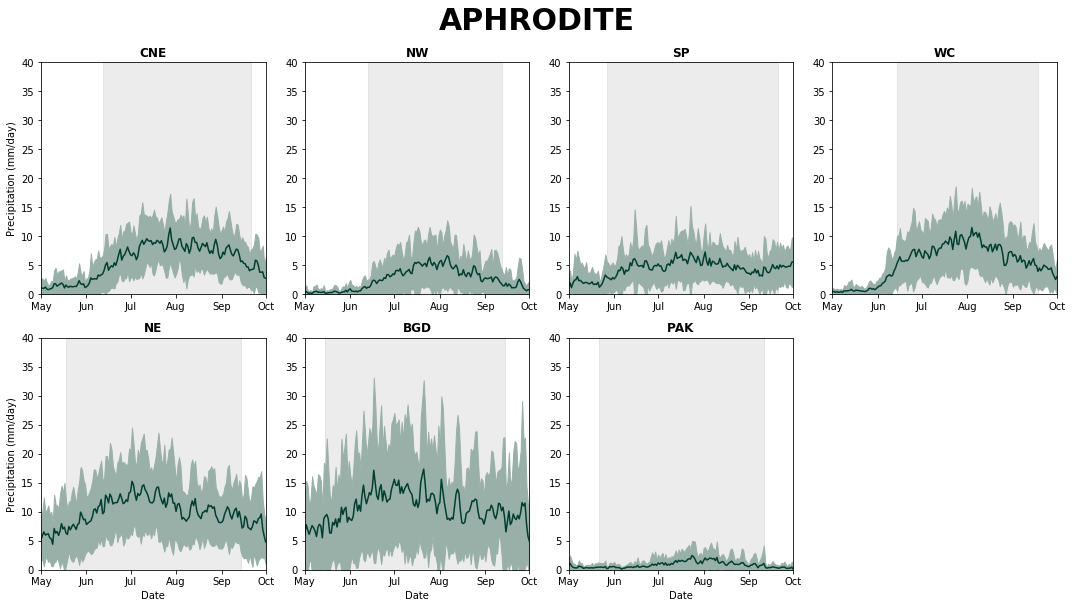

In [13]:
# Plot all regions' monsoon seasons in one figure

# Open monsoon q and precip data
#data_source = 'IMD'
#lat_name = 'LATITUDE'
#lon_name = 'LONGITUDE'
#var_name = 'RAINFALL'
#time_name = 'TIME'

#data_source = 'CHIRPS'
#lat_name = 'latitude'
#lon_name = 'longitude'
#var_name = 'precip'
#time_name = 'time'

#data_source = 'ERA5'
#lat_name = 'latitude'
#lon_name = 'longitude'
#var_name = 'tp'
#time_name = 'time'

#data_source = 'CPC'
#lat_name = 'lat'
#lon_name = 'lon'
#var_name = 'precip'
#time_name = 'time'

data_source = 'APHRODITE'
lat_name = 'latitude'
lon_name = 'longitude'
var_name = 'precip'
time_name = 'time'

data_dir = "/dx01/ivanov/data/" + data_source + "/monsoon_humidheat_timing/"

precip_CNE = pd.read_csv(data_dir + 'precip_CNE.csv')
precip_NW = pd.read_csv(data_dir + 'precip_NW.csv')
precip_SP = pd.read_csv(data_dir + 'precip_SP.csv')
precip_WC = pd.read_csv(data_dir + 'precip_WC.csv')
precip_NE = pd.read_csv(data_dir + 'precip_NE.csv')
precip_bgd = pd.read_csv(data_dir + 'precip_bgd.csv')
precip_pak = pd.read_csv(data_dir + 'precip_pak.csv')

regions = ['CNE','NW','SP','WC','NE','bgd','pak']
reg_precip = [precip_CNE, precip_NW, precip_SP, precip_WC,precip_NE,precip_bgd, precip_pak]
names = ['CNE','NW','SP','WC','NE','BGD','PAK']

file_name = 'onset_mondal_allregions.csv'

onset_df = pd.read_csv(data_dir+file_name, index_col = 0)
retreat_df = pd.read_csv(data_dir+'retreat_mondal_allregions.csv', index_col = 0)

season_start = 121 # May 1st
season_end = 274 # Sept 30

fig, ax2d = plt.subplots(2,4, figsize = (15,8), squeeze = False)
ax1d = ax2d.flatten()

xticks = [121,152,182,213,244,274]
xtick_labels = ['May','Jun','Jul','Aug','Sep','Oct']

for i in range(len(regions)):
    
    region = regions[i]
    precip = reg_precip[i]
    name = names[i]
    
    # Make column of day numbers 
    precip['day_num'] = [datetime.strptime(x, '%Y-%m-%d').timetuple().tm_yday for x in precip[time_name]]

    # Select only days May-September
    precip_season = precip[(precip.day_num >= season_start) & (precip.day_num <= season_end)]

    # Take mean, min, and max to plot
    reg_precip_mean = precip_season.groupby(precip_season.day_num).mean()
    reg_precip_max = precip_season.groupby(precip_season.day_num).max()
    reg_precip_min = precip_season.groupby(precip_season.day_num).min()
    reg_precip_std = precip_season.groupby(precip_season.day_num).std()

    # Calculate cannonical monsoon onset date

    avg_onset = []
    avg_retreat = []
    
    onset_doy = []
    onset_region = onset_df[region]
    
    retreat_doy = []
    retreat_region = retreat_df[region]

    for yearly_onset in onset_region:
        
        yearly_datetime = datetime.strptime(yearly_onset,'%Y-%m-%d')
        day_of_year = yearly_datetime.timetuple().tm_yday
        onset_doy.extend([day_of_year])
    
    avg_onset = np.mean(onset_doy)
    
    for yearly_retreat in retreat_region:
        
        yearly_datetime = datetime.strptime(yearly_retreat,'%Y-%m-%d')
        day_of_year = yearly_datetime.timetuple().tm_yday
        retreat_doy.extend([day_of_year])
    
    avg_retreat = np.mean(retreat_doy)

    line1 = ax1d[i].plot(reg_precip_mean.index, reg_precip_mean[var_name], color = '#003e30')
    shading1 = ax1d[i].fill_between(reg_precip_mean.index,reg_precip_mean[var_name] + reg_precip_std[var_name],reg_precip_mean[var_name] - reg_precip_std[var_name], color = '#99B0A8')
    ax1d[i].set_ylim(0,40)
    ax1d[i].set_xticks(xticks)
    ax1d[i].set_xticklabels(xtick_labels)
    ax1d[i].set_xlim([season_start,season_end])
    ax1d[i].set_title(name, fontweight = 'bold')
    ax1d[i].grid(False)
    
    if i == 0 or i == 4:
        ax1d[i].set_ylabel('Precipitation (mm/day)')
    
    if i >= 4:
        ax1d[i].set_xlabel('Date')

    # Add climatological monsoon length
    ax1d[i].axvspan(avg_onset, avg_retreat, alpha=0.15, color='grey', zorder = 0)

fig.suptitle(data_source, fontsize=30, y=1.05, fontweight = 'bold')

fig.delaxes(ax1d[-1])
plt.tight_layout()

# Figure S14

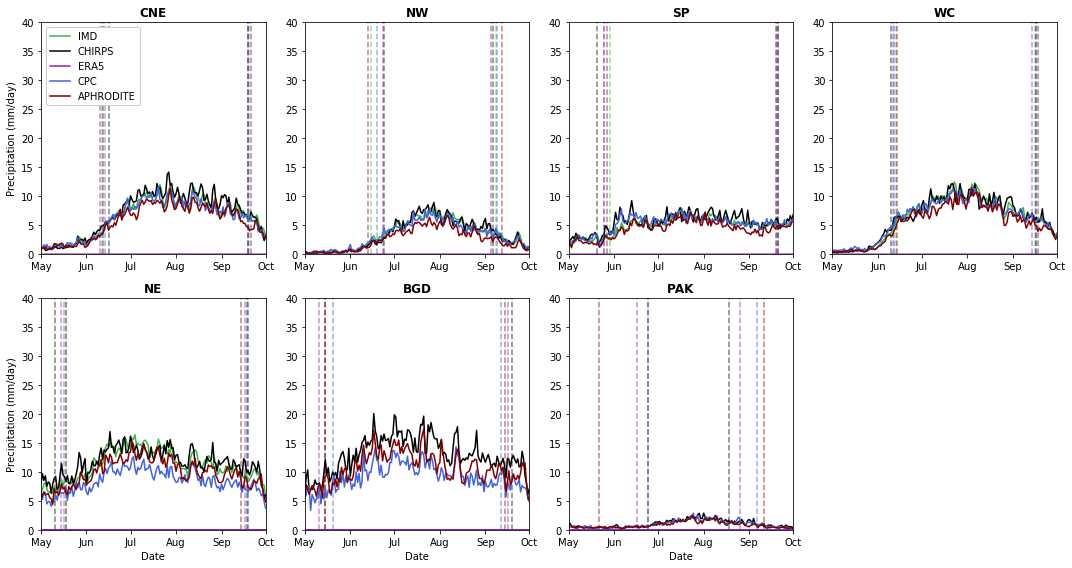

In [13]:
# Plot all regions' monsoon seasons in one figure
data_sources = ['IMD','CHIRPS','ERA5','CPC','APHRODITE']
lat_names = ['LATITUDE','latitude','latitude','lat','latitude']
lon_names = ['LONGITUDE','longitude','longitude','lon','longitude']
var_names = ['RAINFALL','precip','tp','precip','precip']
time_names = ['TIME','time','time','time','time']
data_colors = ['#3cb44b','k','#911eb4','#4363d8','#800000']

regions = ['CNE','NW','SP','WC','NE','bgd','pak']
names = ['CNE','NW','SP','WC','NE','BGD','PAK']

season_start = 121 # May 1st
season_end = 274 # Sept 30

fig, ax2d = plt.subplots(2,4, figsize = (15,8), squeeze = False)
ax1d = ax2d.flatten()

for k in range(len(data_sources)):
    
    data_source = data_sources[k]
    lat_name = lat_names[k]
    lon_name = lon_names[k]
    var_name = var_names[k]
    time_name = time_names[k]
    data_color = data_colors[k]

    data_dir = "/dx01/ivanov/data/" + data_source + "/monsoon_humidheat_timing/"

    precip_CNE = pd.read_csv(data_dir + 'precip_CNE.csv')
    precip_NW = pd.read_csv(data_dir + 'precip_NW.csv')
    precip_SP = pd.read_csv(data_dir + 'precip_SP.csv')
    precip_WC = pd.read_csv(data_dir + 'precip_WC.csv')
    precip_NE = pd.read_csv(data_dir + 'precip_NE.csv')
    precip_bgd = pd.read_csv(data_dir + 'precip_bgd.csv')
    precip_pak = pd.read_csv(data_dir + 'precip_pak.csv')

    reg_precip = [precip_CNE, precip_NW, precip_SP, precip_WC,precip_NE,precip_bgd, precip_pak]
    file_name = 'onset_mondal_allregions.csv'

    onset_df = pd.read_csv(data_dir+file_name, index_col = 0)
    retreat_df = pd.read_csv(data_dir+'retreat_mondal_allregions.csv', index_col = 0)

    xticks = [121,152,182,213,244,274]
    xtick_labels = ['May','Jun','Jul','Aug','Sep','Oct']
    
    if k == 0:
        
        for i in range(len(regions)-2):
            
            region = regions[i]
            precip = reg_precip[i]
            name = names[i]

            # Make column of day numbers 
            precip['day_num'] = [datetime.strptime(x, '%Y-%m-%d').timetuple().tm_yday for x in precip[time_name]]

            # Select only days May-September
            precip_season = precip[(precip.day_num >= season_start) & (precip.day_num <= season_end)]

            # Take mean, min, and max to plot
            reg_precip_mean = precip_season.groupby(precip_season.day_num).mean()
            reg_precip_max = precip_season.groupby(precip_season.day_num).max()
            reg_precip_min = precip_season.groupby(precip_season.day_num).min()
            reg_precip_std = precip_season.groupby(precip_season.day_num).std()

            # Calculate cannonical monsoon onset date
            avg_onset = []
            avg_retreat = []

            onset_doy = []
            onset_region = onset_df[region]

            retreat_doy = []
            retreat_region = retreat_df[region]

            for yearly_onset in onset_region:

                yearly_datetime = datetime.strptime(yearly_onset,'%Y-%m-%d')
                day_of_year = yearly_datetime.timetuple().tm_yday
                onset_doy.extend([day_of_year])

            avg_onset = np.mean(onset_doy)

            for yearly_retreat in retreat_region:

                yearly_datetime = datetime.strptime(yearly_retreat,'%Y-%m-%d')
                day_of_year = yearly_datetime.timetuple().tm_yday
                retreat_doy.extend([day_of_year])

            avg_retreat = np.mean(retreat_doy)

            line1 = ax1d[i].plot(reg_precip_mean.index, reg_precip_mean[var_name], color = data_color, label = data_source)
            ax1d[i].set_ylim(0,40)
            ax1d[i].set_xticks(xticks)
            ax1d[i].set_xticklabels(xtick_labels)
            ax1d[i].set_xlim([121,274])
            ax1d[i].set_title(name, fontweight = 'bold')
            ax1d[i].grid(False)

            # Add climatological monsoon length
            ax1d[i].axvline(avg_onset, alpha=0.5, color=data_color, zorder = 0, linestyle = 'dashed')
            ax1d[i].axvline(avg_retreat, alpha=0.5, color=data_color, zorder = 0, linestyle = 'dashed')

    if k > 0:
        
        for i in range(len(regions)):

            region = regions[i]
            precip = reg_precip[i]
            name = names[i]

            # Make column of day numbers 
            precip['day_num'] = [datetime.strptime(x, '%Y-%m-%d').timetuple().tm_yday for x in precip[time_name]]

            # Select only days May-September
            precip_season = precip[(precip.day_num >= season_start) & (precip.day_num <= season_end)]

            # Take mean, min, and max to plot
            reg_precip_mean = precip_season.groupby(precip_season.day_num).mean()
            reg_precip_max = precip_season.groupby(precip_season.day_num).max()
            reg_precip_min = precip_season.groupby(precip_season.day_num).min()
            reg_precip_std = precip_season.groupby(precip_season.day_num).std()

            # Calculate cannonical monsoon onset date

            avg_onset = []
            avg_retreat = []

            onset_doy = []
            onset_region = onset_df[region]

            retreat_doy = []
            retreat_region = retreat_df[region]

            for yearly_onset in onset_region:

                yearly_datetime = datetime.strptime(yearly_onset,'%Y-%m-%d')
                day_of_year = yearly_datetime.timetuple().tm_yday
                onset_doy.extend([day_of_year])

            avg_onset = np.mean(onset_doy)

            for yearly_retreat in retreat_region:

                yearly_datetime = datetime.strptime(yearly_retreat,'%Y-%m-%d')
                day_of_year = yearly_datetime.timetuple().tm_yday
                retreat_doy.extend([day_of_year])

            avg_retreat = np.mean(retreat_doy)

            line1 = ax1d[i].plot(reg_precip_mean.index, reg_precip_mean[var_name], color = data_color, label = data_source)
            ax1d[i].set_ylim(0,40)
            ax1d[i].set_xticks(xticks)
            ax1d[i].set_xticklabels(xtick_labels)
            ax1d[i].set_xlim([season_start,season_end])
            ax1d[i].set_title(name, fontweight = 'bold')
            ax1d[i].grid(False)

            if i == 0 or i == 4:
                ax1d[i].set_ylabel('Precipitation (mm/day)')

            if i >= 4:
                ax1d[i].set_xlabel('Date')

            # Add climatological monsoon length
            ax1d[i].axvline(avg_onset, alpha=0.5, color=data_color, zorder = 0, linestyle = 'dashed')
            ax1d[i].axvline(avg_retreat, alpha=0.5, color=data_color, zorder = 0, linestyle = 'dashed')

ax1d[0].legend(loc = 'upper left', framealpha = 1)
fig.delaxes(ax1d[-1])
plt.tight_layout()